Arboles de Decisiones

Cindy Patricia Ureche Lopez

Analisis de Datos tarea 5

In [83]:
#Importamos Las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

1. Analisis Exploratorio de Datos

In [12]:
#Cargamos el dataset
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# Dimensiones del dataset
data.shape

(891, 12)

In [20]:
# Calcula las estadísticas descriptivas
data.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [23]:
# Verificación de valores nulos
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

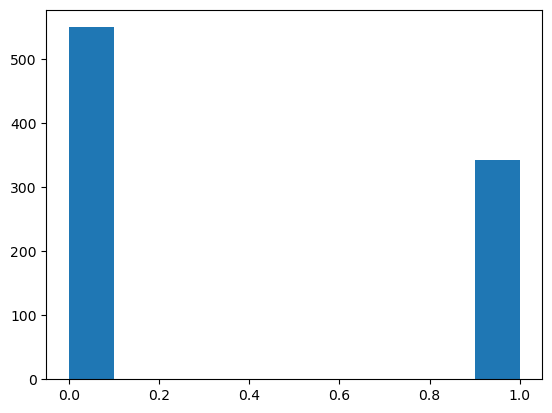

In [31]:
plt.hist(data.Survived)

<Axes: xlabel='Survived', ylabel='Age'>

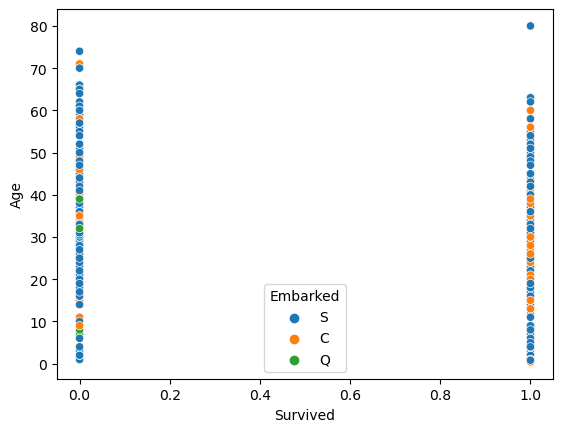

In [38]:
sns.scatterplot(x = "Survived", y = "Age",  hue = "Embarked", data = data)

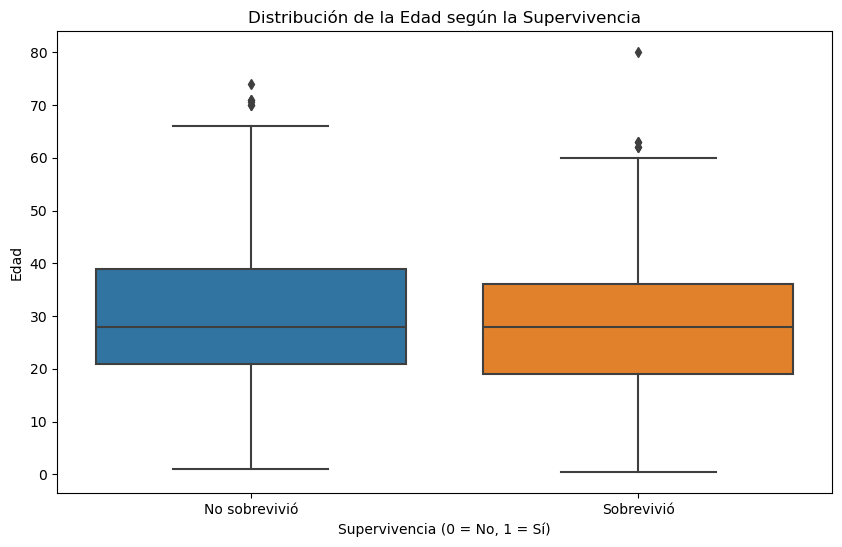

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Survived", y="Age", data=data)
plt.xticks(ticks=[0, 1], labels=["No sobrevivió", "Sobrevivió"])
plt.title("Distribución de la Edad según la Supervivencia")
plt.ylabel("Edad")
plt.xlabel("Supervivencia (0 = No, 1 = Sí)")
plt.show()

In [144]:
predictors_col = ['Age','Survived','PassengerId','Pclass']  # Características independientes
target_col = 'Survived' 

In [146]:
predictors = data[predictors_col]
target = data[target_col]

In [148]:
predictors

,Age,Survived,PassengerId,Pclass
0,22.0,0,1,3
1,38.0,1,2,1
2,26.0,1,3,3
3,35.0,1,4,1
4,35.0,0,5,3
...,...,...,...,...
886,27.0,0,887,2
887,19.0,1,888,1
888,NaN,0,889,3
889,26.0,1,890,1


In [150]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [152]:
corr = predictors.corr()
corr

,Age,Survived,PassengerId,Pclass
Age,1.000000,-0.077221,0.036847,-0.369226
Survived,-0.077221,1.000000,-0.005007,-0.338481
PassengerId,0.036847,-0.005007,1.000000,-0.035144
Pclass,-0.369226,-0.338481,-0.035144,1.000000


Evaluación del Modelo

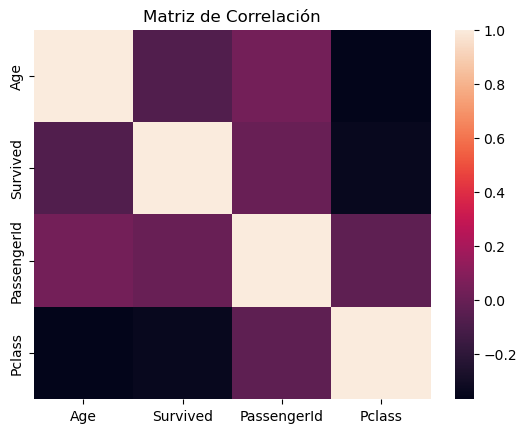

In [154]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

Dividir el Dataset en Train y Test

In [156]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target,test_size=0.2, random_state=13)

In [160]:
tree = DecisionTreeClassifier()

In [162]:
arbol =tree.fit(x_train, y_train)

[Text(0.6, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.473\nsamples = 712\nvalue = [439, 273]'),
 Text(0.4, 0.5, 'x[0] <= 1.5\ngini = 0.368\nsamples = 439\nvalue = [439, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 437\nvalue = [437, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 273\nvalue = [0, 273]')]

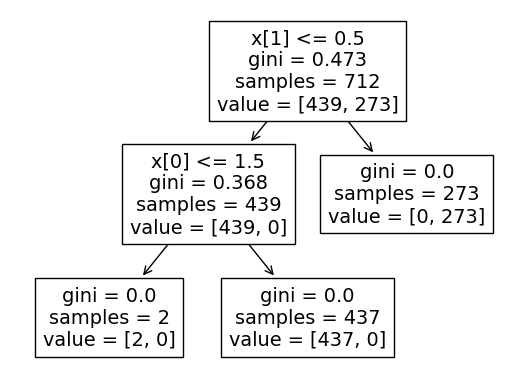

In [164]:
plot_tree(arbol)

In [168]:
predicciones = arbol.predict(x_test)

In [170]:
predicciones

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0])

In [178]:
pd.crosstab(y_test, predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,0,1
Actual,,
0,110,0
1,0,69


In [180]:
accuracy = accuracy_score(y_test, predicciones)
accuracy

1.0

In [184]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

1.0

In [186]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

1.0

In [188]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

1.0